### About autograd
Anybody who has taken a ML 101 course would know about how important gradients are in training a model. 
But calculating gradients is a tiresome process. 
Pytorch uses automatic differentiation to calculate gradient using backpropagation. 
This repository is my attempt to mimic their Tensor class, although at a smaller scale. 



In [13]:
import numpy as np 
import visualize
from tensor import Tensor


In [14]:
# tensor is a special class that wraps some given data by first converting it into a numpy array
# it can track gradient of some variable calculated as a function of this variable
x = Tensor(3.0, requires_grad=True, name='x')         # explicity mention that gradient calculation is required
y = Tensor(4.0, name='y')
z = x*y
z.name = 'z'
print(z)

z.backward(); 
print(f'Once .backward() is called, gradient is calculated by doing a topological sort.')
print(x)
print(y) # no gradient calculated


Tensor(data=12.0, grad=None, requires_grad=True, name='z')
Once .backward() is called, gradient is calculated by doing a topological sort.
Tensor(data=3.0, grad=4.0, requires_grad=True, name='x')
Tensor(data=4.0, grad=None, requires_grad=False, name='y')


### Visualization: 
We can visualize how gradients are flowing using the draw computation graph function from the visualize module

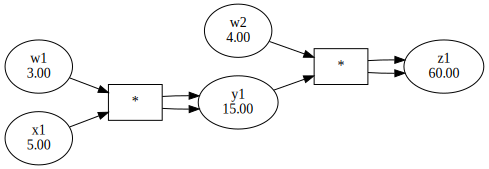

In [15]:
x1 = Tensor(5.0, name='x1')
w1 = Tensor(3.0, requires_grad=True, name='w1')
y1 = x1*w1
y1.name = 'y1'
w2 = Tensor(4.0, requires_grad=True, name='w2')
z1 = y1*w2
z1.name = 'z1'

visualize.draw_computational_graph(z1)


### Training demo 
Now suppose, you want to reduce the value of **z1**. You cannot change **x1**. Just **w1** and **w2**.  
To do that, calculate gradients of z1 with respect to w1 and w2 to update them. 

Value of z1 went from 60.0 to 53.9


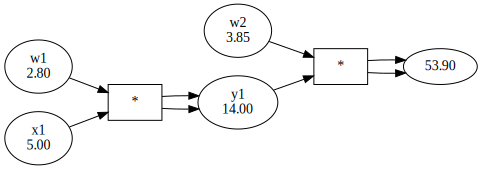

In [16]:
def compute(x1, w1, w2): 
   # recompute the output 
   y1 = x1*w1
   y1.name = 'y1'
   return y1*w2

x1 = Tensor(5.0, name='x1')
w1 = Tensor(3.0, requires_grad=True, name='w1')
y1 = x1*w1
y1.name = 'y1'
w2 = Tensor(4.0, requires_grad=True, name='w2')
z1 = y1*w2
z1.name = 'z1'

z1.backward()
w1.update(lr=0.01)
w2.update(lr=0.01)
z1 = compute(x1, w1, w2)
w1.zero_grad()
w2.zero_grad()
print("Value of z1 went from 60.0 to 53.9")
visualize.draw_computational_graph(z1)


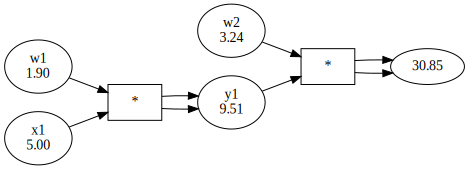

In [17]:
# repeat the same for 5 iterations
for i in range(5):
    z1.backward()
    w1.update(lr=0.01)
    w2.update(lr=0.01)
    z1 = compute(x1, w1, w2)

    w1.zero_grad()
    w2.zero_grad()

visualize.draw_computational_graph(z1)
